# Methodologies  

1. Data Import & Exploration  
2. Identifying Data and Attributes  
3. Determining the Type of Dataset  
4. Data Quality Assessment  
5. Quantitative Statistics  
6. Application of Proximity (Distance Analysis)  
7. Data Mining: Association Rule Mining  


# Data Import & Exploration

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fredapi import Fred
import calendar
import holidays

In [169]:

# Read the CSV file
file_path = 'data/wfp_food_prices_phl.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df

C:\Users\Mark Joseph Nicasio\AppData\Local\Temp\ipykernel_8204\2812996776.py:3: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


date                   admin1               admin2  \
0            #date               #adm1+name           #adm2+name   
1       2000-01-15  National Capital region  Metropolitan Manila   
2       2000-01-15  National Capital region  Metropolitan Manila   
3       2000-01-15  National Capital region  Metropolitan Manila   
4       2000-01-15  National Capital region  Metropolitan Manila   
...            ...                      ...                  ...   
123090  2021-02-15              Region XIII     Agusan del Norte   
123091  2021-02-15              Region XIII     Agusan del Norte   
123092  2021-02-15              Region XIII     Agusan del Norte   
123093  2021-02-15              Region XIII     Agusan del Norte   
123094  2021-02-15              Region XIII     Agusan del Norte   

                  market   latitude   longitude               category  \
0       #loc+market+name   #geo+lat    #geo+lon             #item+type   
1           Metro Manila  14.604167  120.982222     cereals and tubers   
2           Metro Manila  14.604167  120.982222     cereals and tubers   
3           Metro Manila  14.604167  120.982222     cereals and tubers   
4           Metro Manila  14.604167  120.982222     cereals and tubers   
...                  ...        ...         ...                    ...   
123090       Butuan City   8.957268  125.534029  vegetables and fruits   
123091       Butuan City   8.957268  125.534029  vegetables and fruits   
123092       Butuan City   8.957268  125.534029  vegetables and fruits   
123093       Butuan City   8.957268  125.534029  vegetables and fruits   
123094       Butuan City   8.957268  125.534029  vegetables and fruits   

                      commodity        unit         priceflag  \
0                    #item+name  #item+unit  #item+price+flag   
1          Maize flour (yellow)          KG            actual   
2       Rice (milled, superior)          KG            actual   
3        Rice (regular, milled)          KG            actual   
4        Rice (regular, milled)          KG            actual   
...                         ...         ...               ...   
123090                Calamansi          KG         aggregate   
123091                Eggplants          KG         aggregate   
123092             Onions (red)          KG         aggregate   
123093                   Papaya          KG         aggregate   
123094                 Tomatoes          KG         aggregate   

               pricetype   currency   price    usdprice  
0       #item+price+type  #currency  #value  #value+usd  
1                 Retail        PHP    15.0      0.3717  
2              Wholesale        PHP   18.35      0.4548  
3                 Retail        PHP    18.0      0.4461  
4              Wholesale        PHP   16.35      0.4052  
...                  ...        ...     ...         ...  
123090            Retail        PHP   71.67      1.4949  
123091            Retail        PHP  103.33      2.1555  
123092            Retail        PHP  114.17      2.3814  
123093            Retail        PHP    45.0      0.9387  
123094            Retail        PHP   81.67      1.7035  

[123095 rows x 14 columns]

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123095 entries, 0 to 123094
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       123095 non-null  object
 1   admin1     123095 non-null  object
 2   admin2     123095 non-null  object
 3   market     123095 non-null  object
 4   latitude   123095 non-null  object
 5   longitude  123095 non-null  object
 6   category   123095 non-null  object
 7   commodity  123095 non-null  object
 8   unit       123095 non-null  object
 9   priceflag  123095 non-null  object
 10  pricetype  123095 non-null  object
 11  currency   123095 non-null  object
 12  price      123095 non-null  object
 13  usdprice   123095 non-null  object
dtypes: object(14)
memory usage: 13.1+ MB


In [171]:
df = df.drop(index=0).reset_index(drop=True)

In [172]:
# Filter rows where 'priceflag' is either 'actual' or 'aggregate'
filtered_df = df[df['priceflag'].isin(['actual,aggregate'])]

# Display the filtered rows
filtered_df

date                   admin1               admin2  \
119530  2020-05-15  National Capital region  Metropolitan Manila   
119531  2020-05-15  National Capital region  Metropolitan Manila   
119532  2020-05-15  National Capital region  Metropolitan Manila   
119533  2020-05-15  National Capital region  Metropolitan Manila   
119534  2020-05-15  National Capital region  Metropolitan Manila   
...            ...                      ...                  ...   
119949  2021-02-15  National Capital region  Metropolitan Manila   
119950  2021-02-15  National Capital region  Metropolitan Manila   
119951  2021-02-15  National Capital region  Metropolitan Manila   
119952  2021-02-15  National Capital region  Metropolitan Manila   
119953  2021-02-15  National Capital region  Metropolitan Manila   

              market   latitude   longitude               category  \
119530  Metro Manila  14.604167  120.982222     cereals and tubers   
119531  Metro Manila  14.604167  120.982222     cereals and tubers   
119532  Metro Manila  14.604167  120.982222     cereals and tubers   
119533  Metro Manila  14.604167  120.982222     cereals and tubers   
119534  Metro Manila  14.604167  120.982222    meat, fish and eggs   
...              ...        ...         ...                    ...   
119949  Metro Manila  14.604167  120.982222  vegetables and fruits   
119950  Metro Manila  14.604167  120.982222  vegetables and fruits   
119951  Metro Manila  14.604167  120.982222  vegetables and fruits   
119952  Metro Manila  14.604167  120.982222  vegetables and fruits   
119953  Metro Manila  14.604167  120.982222  vegetables and fruits   

                     commodity  unit         priceflag pricetype currency  \
119530        Potatoes (Irish)    KG  actual,aggregate    Retail      PHP   
119531          Rice (premium)    KG  actual,aggregate    Retail      PHP   
119532  Rice (regular, milled)    KG  actual,aggregate    Retail      PHP   
119533          Rice (special)    KG  actual,aggregate    Retail      PHP   
119534                    Eggs  Unit  actual,aggregate    Retail      PHP   
...                        ...   ...               ...       ...      ...   
119949               Calamansi    KG  actual,aggregate    Retail      PHP   
119950                  Ginger    KG  actual,aggregate    Retail      PHP   
119951       Mangoes (carabao)    KG  actual,aggregate    Retail      PHP   
119952            Onions (red)    KG  actual,aggregate    Retail      PHP   
119953                Tomatoes    KG  actual,aggregate    Retail      PHP   

         price usdprice  
119530   86.16   1.7011  
119531   46.13   0.9108  
119532   36.65   0.7236  
119533   53.23   1.0509  
119534    6.83   0.1348  
...        ...      ...  
119949   99.45   2.0744  
119950  156.65   3.2676  
119951  197.03     4.11  
119952  111.64   2.3287  
119953   71.15   1.4842  

[424 rows x 14 columns]

In [173]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
duplicate_rows

Empty DataFrame
Columns: [date, admin1, admin2, market, latitude, longitude, category, commodity, unit, priceflag, pricetype, currency, price, usdprice]
Index: []

In [174]:
categorical_cols = [
    "date", "admin1", "admin2", "market", 
    "category", "commodity", "unit", "priceflag", 
    "pricetype", "currency"
]

numerical_cols = ["latitude", "longitude", "price", "usdprice"]

In [175]:
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 40)
    

Value counts for 'date':
date
2020-07-15    2795
2020-10-15    2790
2020-08-15    2782
2020-05-15    2745
2020-11-15    2743
              ... 
2019-06-15      18
2004-02-15      18
2020-02-15      18
2019-12-15      16
2019-11-15      16
Name: count, Length: 299, dtype: int64
----------------------------------------
Value counts for 'admin1':
admin1
Region III                              10625
Region VI                                9119
Region V                                 8893
Region VIII                              8525
Cordillera Administrative region         8287
Region XI                                8202
Region X                                 7190
Region IV-B                              7122
Region IV-A                              7084
Region XII                               6996
Region XIII                              6930
Region VII                               6681
Region I                                 6205
Region II                                6151
Reg

In [176]:
print("Descriptive statistics for numerical columns:")
print(df[numerical_cols].describe())

Descriptive statistics for numerical columns:
       latitude longitude   price usdprice
count    123094    123094  123094   123094
unique      192       190   24478    54978
top        7.18    125.44    30.0   0.8092
freq       2438      2438     474       32


In [177]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

# Data Dictionary

In [178]:
# Data dictionary descriptions for the columns (Updated variable names)
data_descriptions = {
    "date": "Date when the price was recorded",
    "admin1": "First administrative division (region) where the market is located",
    "admin2": "Second administrative division (city) where the market is located",
    "market": "Name of the specific market where the commodity was recorded",
    "latitude": "Latitude coordinate of the market’s location",
    "longitude": "Longitude coordinate of the market’s location",
    "category": "General category to which the commodity belongs (e.g., 'oil and fats', 'cereals and tubers')",
    "commodity": "Specific item being traded (e.g., rice, wheat, tomatoes)",
    "unit": "Measurement unit of the commodity (e.g., kg, liter, piece)",
    "priceflag": "Flag indicating the reliability or nature of the price data (e.g., actual, aggregate)",
    "pricetype": "Type of price recorded (e.g., wholesale, retail, farmgate)",
    "currency": "Currency in which the price was recorded (e.g., USD, PHP)",
    "price": "Recorded price of the commodity in its local currency",
    "usdprice": "Price of the commodity converted into USD"
}


# Create the data dictionary DataFrame
data_dictionary = pd.DataFrame({
    'Column Name': df.columns,
    'Description': [data_descriptions.get(col, 'No description available') for col in df.columns],
    'Data Type': df.dtypes.values
})

# Display the data dictionary
data_dictionary


Column Name                                        Description Data Type
0         date                   Date when the price was recorded    object
1       admin1  First administrative division (region) where t...    object
2       admin2  Second administrative division (city) where th...    object
3       market  Name of the specific market where the commodit...    object
4     latitude       Latitude coordinate of the market’s location    object
5    longitude      Longitude coordinate of the market’s location    object
6     category  General category to which the commodity belong...    object
7    commodity  Specific item being traded (e.g., rice, wheat,...    object
8         unit  Measurement unit of the commodity (e.g., kg, l...    object
9    priceflag  Flag indicating the reliability or nature of t...    object
10   pricetype  Type of price recorded (e.g., wholesale, retai...    object
11    currency  Currency in which the price was recorded (e.g....    object
12       price  Recorded price of the commodity in its local c...    object
13    usdprice          Price of the commodity converted into USD    object

# Identifying Data and Attributes

In [179]:
import pandas as pd

# --- Convert Data Types ---
# Convert 'date' to datetime (invalid formats become NaT)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert latitude and longitude to numeric (float)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Convert price and usdprice to numeric (float)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

# --- Validate Reasonable Values ---
# Define valid conditions for each column:
valid_date = df['date'].notna()  # Date is valid if not NaT

# Add condition to only include dates on or after January 1, 2019
valid_start_date = df['date'] >= pd.Timestamp('2019-01-01')

# Latitude: valid if not NaN and between -90 and 90
valid_lat = df['latitude'].notna() & (df['latitude'] >= -90) & (df['latitude'] <= 90)

# Longitude: valid if not NaN and between -180 and 180
valid_lon = df['longitude'].notna() & (df['longitude'] >= -180) & (df['longitude'] <= 180)

# Price: valid if not NaN and non-negative
valid_price = df['price'].notna() & (df['price'] >= 0)

# usdprice: valid if not NaN and non-negative
valid_usdprice = df['usdprice'].notna() & (df['usdprice'] >= 0)

# Combine all conditions: only rows meeting all criteria are valid
all_valid = valid_date & valid_start_date & valid_lat & valid_lon & valid_price & valid_usdprice

# --- Create a New DataFrame with Only Valid Rows ---
df_cleaned = df[all_valid].copy()

print("Number of rows before cleaning:", len(df))
print("Number of rows after cleaning:", len(df_cleaned))


Number of rows before cleaning: 123094
Number of rows after cleaning: 100921


In [180]:
import pandas as pd
import numpy as np

# Ensure 'date' is a datetime object
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

# Create a 'month' column as a Period (year-month)
df_cleaned['month'] = df_cleaned['date'].dt.to_period('M')

# Function to find missing months for a group
def find_missing_months(group):
    # Determine the full range of months between the min and max month in the group
    full_range = pd.period_range(start=group['month'].min(), end=group['month'].max(), freq='M')
    # Get the unique months present in the group
    present = group['month'].unique()
    # Find missing months (set difference)
    missing = full_range.difference(present)
    return pd.Series({'missing_months': missing, 'num_missing': len(missing)})

# Group by commodity, admin1, and market and apply the function
missing_df = df_cleaned.groupby(['commodity', 'admin1', 'market']).apply(find_missing_months).reset_index()

# Display groups with missing months (i.e., where num_missing > 0)
missing_groups = missing_df[missing_df['num_missing'] > 0]
print("Groups with missing months:")
print(missing_groups)

Groups with missing months:
          commodity                                admin1             market  \
0         Anchovies  Autonomous region in Muslim Mindanao            Basilan   
1         Anchovies  Autonomous region in Muslim Mindanao      Lanao del Sur   
2         Anchovies  Autonomous region in Muslim Mindanao        Maguindanao   
3         Anchovies  Autonomous region in Muslim Mindanao               Sulu   
4         Anchovies  Autonomous region in Muslim Mindanao          Tawi-Tawi   
...             ...                                   ...                ...   
5053  Water spinach                            Region XII     Sultan Kudarat   
5054  Water spinach                           Region XIII   Agusan del Norte   
5055  Water spinach                           Region XIII     Agusan del Sur   
5056  Water spinach                           Region XIII  Surigao del Norte   
5057  Water spinach                           Region XIII    Surigao del Sur   

           

In [181]:
# Mark groups as missing or complete based on the number of missing months
missing_df['has_missing'] = missing_df['num_missing'] > 0

# Merge this indicator back with some aggregated statistics from your original data
group_stats = df_cleaned.groupby(['commodity', 'admin1', 'market']).agg({
    'price': ['mean', 'std'],
    'latitude': ['mean'],
    'longitude': ['mean']
}).reset_index()

group_stats.columns = ['commodity', 'admin1', 'market', 'price_mean', 'price_std', 'latitude', 'longitude']

# Merge with missing indicator
group_stats = pd.merge(group_stats, missing_df[['commodity', 'admin1', 'market', 'has_missing']], on=['commodity', 'admin1', 'market'], how='left')
group_stats['has_missing'] = group_stats['has_missing'].fillna(False)

print(group_stats.head(10))

   commodity                                admin1             market  \
0  Anchovies  Autonomous region in Muslim Mindanao            Basilan   
1  Anchovies  Autonomous region in Muslim Mindanao      Lanao del Sur   
2  Anchovies  Autonomous region in Muslim Mindanao        Maguindanao   
3  Anchovies  Autonomous region in Muslim Mindanao               Sulu   
4  Anchovies  Autonomous region in Muslim Mindanao          Tawi-Tawi   
5  Anchovies      Cordillera Administrative region            Benguet   
6  Anchovies      Cordillera Administrative region  Mountain Province   
7  Anchovies               National Capital region       Metro Manila   
8  Anchovies                              Region I       Ilocos Norte   
9  Anchovies                              Region I         Ilocos Sur   

   price_mean  price_std   latitude   longitude  has_missing  
0  133.406571  37.487119   6.663056  122.136111         True  
1  112.138182  12.000940   7.996562  124.279092         True  
2  142.

In [182]:
import pandas as pd
import numpy as np

# --- Assume your missing_df is computed as before, which includes:
# 'commodity', 'admin1', 'market', 'missing_months', and 'num_missing'

# Create a binary indicator for missingness for each group:
missing_df['has_missing'] = missing_df['num_missing'] > 0

# Now, compute some group-level statistics from the original data.
# For example, compute the mean values for key variables for each (commodity, admin1, market) group.
group_stats = (
    df_cleaned.groupby(['commodity', 'admin1', 'market'])
             .agg({
                 'price': 'mean',
                 'latitude': 'mean',
                 'longitude': 'mean'
             })
             .reset_index()
)

# Merge the missingness indicator into the group-level stats.
group_stats = group_stats.merge(
    missing_df[['commodity', 'admin1', 'market', 'has_missing']],
    on=['commodity', 'admin1', 'market'],
    how='left'
)

# Fill missing has_missing with False (if any groups didn't appear in missing_df)
group_stats['has_missing'] = group_stats['has_missing'].fillna(False)

print("Group-level statistics with missingness indicator:")
print(group_stats.head(10))

# Now, convert the boolean missing indicator to a numeric variable (0/1)
group_stats['missing_numeric'] = group_stats['has_missing'].astype(int)

# Compute correlations between the missingness indicator and the key variables.
corr_matrix = group_stats[['price', 'latitude', 'longitude', 'missing_numeric']].corr()
print("\nCorrelation matrix between group-level variables and missingness:")
print(corr_matrix)

# Interpretation:
# - If 'missing_numeric' shows little or no correlation with the key variables, this suggests missingness is closer to MCAR.
# - If there are significant correlations (positive or negative), this suggests missingness might be MAR.


Group-level statistics with missingness indicator:
   commodity                                admin1             market  \
0  Anchovies  Autonomous region in Muslim Mindanao            Basilan   
1  Anchovies  Autonomous region in Muslim Mindanao      Lanao del Sur   
2  Anchovies  Autonomous region in Muslim Mindanao        Maguindanao   
3  Anchovies  Autonomous region in Muslim Mindanao               Sulu   
4  Anchovies  Autonomous region in Muslim Mindanao          Tawi-Tawi   
5  Anchovies      Cordillera Administrative region            Benguet   
6  Anchovies      Cordillera Administrative region  Mountain Province   
7  Anchovies               National Capital region       Metro Manila   
8  Anchovies                              Region I       Ilocos Norte   
9  Anchovies                              Region I         Ilocos Sur   

        price   latitude   longitude  has_missing  
0  133.406571   6.663056  122.136111         True  
1  112.138182   7.996562  124.279092     

In [183]:
# import pandas as pd
# import numpy as np
# from scipy.stats import chi2_contingency  # Optional: for a formal test

# # --- Assume missing_exploded is already defined ---
# # 
# # should contain at least:
# # 'commodity', 'admin1', 'market', and 'missing_months' (with strings like "2020-09")

# # Helper function to safely convert period strings to a Timestamp (using the 1st day of the month)
# def safe_convert_to_date(period_str):
#     if pd.isna(period_str) or period_str == 'NaT':
#         return pd.NaT
#     try:
#         return pd.to_datetime(period_str + '-01', format='%Y-%m-%d', errors='coerce')
#     except Exception as e:
#         return pd.NaT

# # Convert the 'missing_months' column to actual dates (we use the 1st day for conversion)
# missing_exploded['missing_date'] = missing_exploded['missing_months'].apply(safe_convert_to_date)

# # Drop rows where conversion failed
# missing_exploded = missing_exploded.dropna(subset=['missing_date'])

# # Define a function to assign pandemic phase based on a date
# def assign_pandemic_phase(date):
#     if date < pd.Timestamp('2020-03-01'):
#         return "Pre-pandemic"
#     elif date < pd.Timestamp('2022-01-01'):
#         return "Pandemic"
#     else:
#         return "Post-pandemic"

# # Apply the function to create a new column for the missing month's pandemic phase
# missing_exploded['missing_pandemic_phase'] = missing_exploded['missing_date'].apply(assign_pandemic_phase)

# # Group by the missing pandemic phase and count how many missing months fall into each phase
# missing_phase_counts = missing_exploded.groupby('missing_pandemic_phase').size().reset_index(name='missing_count')

# # Compute the percentage of missing months per phase
# total_missing = missing_exploded.shape[0]
# missing_phase_counts['percent'] = 100 * missing_phase_counts['missing_count'] / total_missing

# print("Missing months counts by pandemic phase:")
# print(missing_phase_counts)


In [184]:
import pandas as pd
import numpy as np

# Ensure 'date' is a datetime object and create a 'month' column as a Period (year-month)

df_cleaned['month'] = df_cleaned['date'].dt.to_period('M')

# Define the numeric columns for which you'll impute values
numeric_cols = ['price']

# Define the grouping keys
group_keys = ['commodity', 'admin1', 'market', 'latitude', 'longitude']

# List to store imputed rows
imputed_rows = []

# For each combination of commodity, admin1, and market...
for name, group in df_cleaned.groupby(group_keys):
    # Create the full range of months between the earliest and latest month in the group
    full_range = pd.period_range(start=group['month'].min(), end=group['month'].max(), freq='M')
    # Unique months present in the group
    present = group['month'].unique()
    # Determine missing months (set difference)
    missing = full_range.difference(present)
    
    # If there are missing months, impute a row for each missing month
    if len(missing) > 0:
        # Compute the median for each numeric column within this group
        group_medians = group[numeric_cols].median()
        for m in missing:
            # Build a new row as a dictionary with group keys
            new_row = {key: value for key, value in zip(group_keys, name)}
            new_row['month'] = m
            # Convert the period to a Timestamp; here we set the day to the 15th of the month
            new_row['date'] = m.to_timestamp() + pd.offsets.Day(14)
            # Fill numeric columns with the group medians
            for col in numeric_cols:
                new_row[col] = group_medians[col]
            imputed_rows.append(new_row)

# Create a DataFrame of imputed rows
df_imputed = pd.DataFrame(imputed_rows)

# Optionally, combine the imputed rows with your original DataFrame
df_combined = pd.concat([df_cleaned, df_imputed], ignore_index=True)

print("Number of imputed rows:", len(df_imputed))
print("Combined data shape:", df_combined.shape)
print(df_imputed.head())


Number of imputed rows: 59457
Combined data shape: (160378, 15)
   commodity                                admin1   market  latitude  \
0  Anchovies  Autonomous region in Muslim Mindanao  Basilan  6.663056   
1  Anchovies  Autonomous region in Muslim Mindanao  Basilan  6.663056   
2  Anchovies  Autonomous region in Muslim Mindanao  Basilan  6.663056   
3  Anchovies  Autonomous region in Muslim Mindanao  Basilan  6.663056   
4  Anchovies  Autonomous region in Muslim Mindanao  Basilan  6.663056   

    longitude    month       date   price  
0  122.136111  2020-10 2020-10-15  116.25  
1  122.136111  2021-04 2021-04-15  116.25  
2  122.136111  2021-07 2021-07-15  116.25  
3  122.136111  2021-08 2021-08-15  116.25  
4  122.136111  2021-10 2021-10-15  116.25  


In [185]:
# Extract month from the date
df_cleaned['month'] = df_cleaned['date'].dt.month

# Convert month to cyclic features
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)


In [186]:
central_lat = 14.5995   # Example: Latitude for Manila, Philippines
central_lon = 120.9842  # Example: Longitude for Manila, Philippines

# Define the Haversine function to compute distance in kilometers
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Earth's radius in kilometers (6371 km)
    km = 6371 * c
    return km

df_cleaned['distance_from_central'] = haversine_distance(central_lat, central_lon, df_cleaned['latitude'], df_cleaned['longitude'])

print(df_cleaned[['market', 'latitude', 'longitude', 'distance_from_central']].tail())

             market  latitude   longitude  distance_from_central
123089  Butuan City  8.957268  125.534029             799.170559
123090  Butuan City  8.957268  125.534029             799.170559
123091  Butuan City  8.957268  125.534029             799.170559
123092  Butuan City  8.957268  125.534029             799.170559
123093  Butuan City  8.957268  125.534029             799.170559


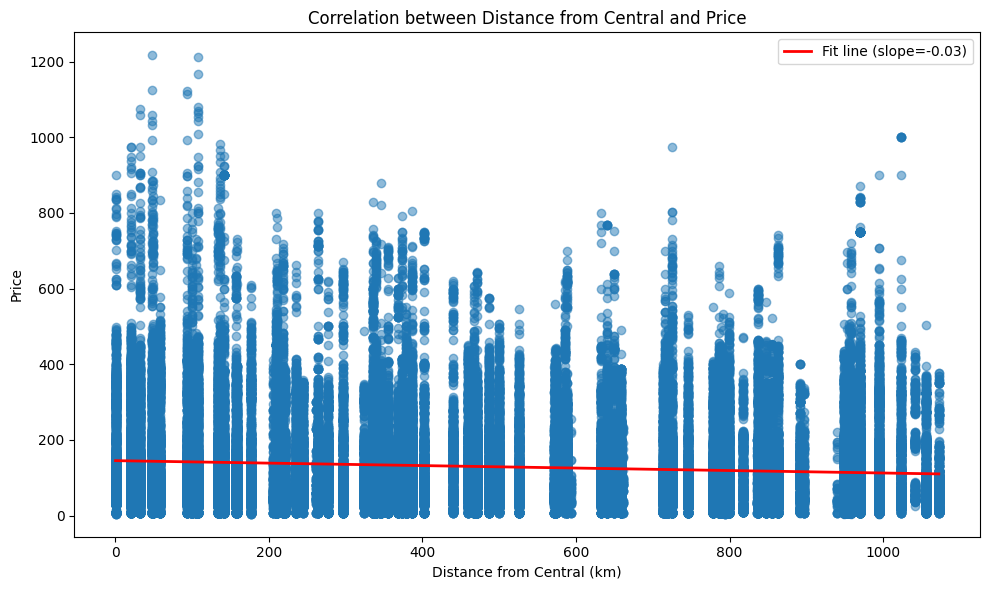

In [187]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['distance_from_central'], df_cleaned['price'], alpha=0.5)
plt.xlabel('Distance from Central (km)')
plt.ylabel('Price')
plt.title('Correlation between Distance from Central and Price')

slope, intercept = np.polyfit(df_cleaned['distance_from_central'], df_cleaned['price'], 1)
x_vals = np.array([df_cleaned['distance_from_central'].min(), df_cleaned['distance_from_central'].max()])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', linewidth=2, label=f'Fit line (slope={slope:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

In [188]:
def determine_climate_season(date):
    month = date.month
    if 6 <= month <= 11:
        return "Rainy Season"
    elif month in [12, 1, 2]:
        return "Cool Dry Season"
    elif month in [3, 4, 5]:
        return "Hot Dry Season"
    else:
        return "Unknown"  # Fallback in case of unexpected values

df_cleaned['climate_season'] = df_cleaned['date'].apply(determine_climate_season)


In [189]:
# --- Retrieve USD-PHP Exchange Rate Data from FRED ---
fred = Fred(api_key='3acdf33d996d4189da7cb3843f1c5023') 

# Retrieve the exchange rate series from FRED using NBPHBIS (USD-PHP exchange rate)
exchange_series = fred.get_series('NBPHBIS', observation_start='2019-01-01', observation_end='2025-01-15')

df_exchange = exchange_series.to_frame(name='usd_exchange_rate')
df_exchange.index = pd.to_datetime(df_exchange.index)

# --- Process Exchange Rate Data ---
df_exchange_monthly = df_exchange.resample('M').mean().reset_index()
df_exchange_monthly['date'] = df_exchange_monthly['index'].apply(lambda d: d.replace(day=15))
df_exchange_final = df_exchange_monthly[['date', 'usd_exchange_rate']]

print("Exchange Rate Data (first 5 rows):")
print(df_exchange_final.head())

df_merged = pd.merge(df_cleaned, df_exchange_final, on='date', how='left')

print("\nMerged Data with Exchange Rate (last 5 rows):")
print(df_merged.tail())


Exchange Rate Data (first 5 rows):
        date  usd_exchange_rate
0 2019-01-15              93.76
1 2019-02-15              94.16
2 2019-03-15              93.74
3 2019-04-15              94.87
4 2019-05-15              95.28

Merged Data with Exchange Rate (last 5 rows):
             date       admin1            admin2       market  latitude  \
100916 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100917 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100918 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100919 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100920 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   

         longitude               category     commodity unit  priceflag  \
100916  125.534029  vegetables and fruits     Calamansi   KG  aggregate   
100917  125.534029  vegetables and fruits     Eggplants   KG  aggregate   
100918  125.534029  vegetables and fruits  Onions 

In [190]:
def flag_pandemic_phase(date):
    """
    Flag the pandemic phase based on the date.
    
    - Pre-pandemic: before March 1, 2020
    - Pandemic: from March 1, 2020 up to December 31, 2021
    - Post-pandemic: from January 1, 2022 onward
    """
    if date < pd.Timestamp('2020-03-01'):
        return "Pre-pandemic"
    elif date < pd.Timestamp('2022-01-01'):
        return "Pandemic"
    else:
        return "Post-pandemic"
    
df_merged['pandemic_phase'] = df_merged['date'].apply(flag_pandemic_phase)
print(df_merged[['date', 'pandemic_phase']].head(10))

        date pandemic_phase
0 2019-01-15   Pre-pandemic
1 2019-01-15   Pre-pandemic
2 2019-01-15   Pre-pandemic
3 2019-01-15   Pre-pandemic
4 2019-01-15   Pre-pandemic
5 2019-01-15   Pre-pandemic
6 2019-01-15   Pre-pandemic
7 2019-01-15   Pre-pandemic
8 2019-01-15   Pre-pandemic
9 2019-01-15   Pre-pandemic


In [191]:
ph_holidays = holidays.PH(years=range(2019, 2025))

major_holidays_list = [
    "New Year's Day", "Christmas Day",
]

def major_holiday_flag(date, major_list=major_holidays_list):
    """
    Flag whether there is any major holiday within the same month as 'date'.
    Returns 1 if a major holiday is found in that month, otherwise 0.
    """
    year = date.year
    month = date.month
    # Determine the start and end dates of the month
    start_date = pd.Timestamp(year, month, 1)
    end_date = pd.Timestamp(year, month, calendar.monthrange(year, month)[1])
    
    # Check each date in the month for a major holiday
    for single_date in pd.date_range(start_date, end_date):
        if single_date in ph_holidays:
            holiday_name = ph_holidays[single_date]
            # Check if the holiday name matches any in our major list (case insensitive)
            if any(major.lower() in holiday_name.lower() for major in major_list):
                return 1
    return 0

df_merged['major_holiday_flag'] = df_merged['date'].apply(major_holiday_flag)

print(df_merged[['date', 'major_holiday_flag']].head(20))


         date  major_holiday_flag
0  2019-01-15                   1
1  2019-01-15                   1
2  2019-01-15                   1
3  2019-01-15                   1
4  2019-01-15                   1
5  2019-01-15                   1
6  2019-01-15                   1
7  2019-01-15                   1
8  2019-01-15                   1
9  2019-01-15                   1
10 2019-01-15                   1
11 2019-01-15                   1
12 2019-01-15                   1
13 2019-01-15                   1
14 2019-01-15                   1
15 2019-01-15                   1
16 2019-01-15                   1
17 2019-01-15                   1
18 2019-01-15                   1
19 2019-01-15                   1


In [192]:
df_metro = df_merged[df_merged['admin1'] == 'National Capital region']

# Keep only the date and holiday flag columns
df_metro = df_metro[['date', 'major_holiday_flag']].copy()

# Create a 'year' column from the date
df_metro['year'] = df_metro['date'].dt.year

# Sort the DataFrame by date (if not already sorted)
df_metro.sort_values('date', inplace=True)

# Print the table for each year
for year, group in df_metro.groupby('year'):
    print(f"\n--- Year: {year} ---")
    print(group[['date', 'major_holiday_flag']].to_string(index=False))


--- Year: 2019 ---
      date  major_holiday_flag
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-03-15                   0
2019-03-15                   0
2019-03-15         

Compute Inflation Rate by Commodity & Pandemic Phase

In [193]:
import pandas as pd
import numpy as np

df_merged['date'] = pd.to_datetime(df_merged['date'])

df_merged['month'] = df_merged['date'].dt.to_period('M')

# Group by pandemic_phase, commodity, and month, then compute the average price for that month.
agg_phase = (
    df_merged.groupby(['admin1', 'admin2', 'market', 'latitude', 'longitude', 
                       'category', 'unit', 'priceflag', 'pricetype', 'usdprice', 
                       'major_holiday_flag', 'climate_season', 'commodity', 
                       'month', 'distance_from_central', 'pandemic_phase'])['price']
    .mean()
    .reset_index()
)

# Sort by pandemic_phase, commodity, and month so that the percentage change is computed chronologically.
agg_phase = agg_phase.sort_values(by=['pandemic_phase', 'commodity', 'month'])

# Compute the inflation rate (percentage change in average price) for each commodity within each pandemic phase.
agg_phase['inflation_rate'] = (
    agg_phase.groupby(['pandemic_phase', 'commodity'])['price']
    .pct_change() * 100
)

# Fill NaN values (which occur as the first observation for each group) with the median inflation rate for that group.
agg_phase['inflation_rate'] = agg_phase.groupby(['pandemic_phase', 'commodity'])['inflation_rate'] \
                                     .transform(lambda x: x.fillna(x.median()))

print("Inflation rate by commodity for each pandemic phase:")
print(agg_phase.head(20))


Inflation rate by commodity for each pandemic phase:
                                     admin1               admin2  \
363    Autonomous region in Muslim Mindanao              Basilan   
2331   Autonomous region in Muslim Mindanao          Maguindanao   
3438   Autonomous region in Muslim Mindanao                 Sulu   
7422       Cordillera Administrative region              Benguet   
11145      Cordillera Administrative region    Mountain Province   
12115               National Capital region  Metropolitan Manila   
15043                              Region I           Ilocos Sur   
26223                            Region III              Bulacan   
27554                            Region III              Bulacan   
29133                            Region III          Nueva Ecija   
32895                           Region IV-A             Batangas   
34326                           Region IV-A               Cavite   
37950                           Region IV-A                Riza

Compute Inflation Rate by Commodity & (Climate Season + Market)

In [194]:
import pandas as pd
import numpy as np

df_merged['date'] = pd.to_datetime(df_merged['date'], errors='coerce')
df_merged['month'] = df_merged['date'].dt.to_period('M')

agg_geo = (
    df_merged.groupby(['admin1', 'admin2', 'market', 'latitude', 'longitude', 
                       'category', 'unit', 'priceflag', 'pricetype', 'usdprice', 
                       'major_holiday_flag', 'climate_season', 'commodity', 
                       'month', 'distance_from_central', 'pandemic_phase'])['price']
    .mean()
    .reset_index()
)

agg_geo = agg_geo.sort_values(by=['admin1', 'climate_season', 'commodity', 'month'])

# Compute the inflation rate (percentage change in average price) for each commodity 
# within each group.
agg_geo['inflation_rate'] = (
    agg_geo.groupby(['admin1', 'climate_season', 'commodity'])['price']
    .pct_change() * 100
)

# Fill missing inflation_rate values with the median inflation rate of the respective group.
# For groups that have no valid (non-missing) values, fill with 0.
agg_geo['inflation_rate'] = agg_geo.groupby(['admin1', 'climate_season', 'commodity'])['inflation_rate'] \
    .transform(lambda x: x.fillna(x.dropna().median() if len(x.dropna()) > 0 else 0))

print("Inflation rate by commodity for each combination of climate season and region (after median imputation):")
print(agg_geo.head(20))


Inflation rate by commodity for each combination of climate season and region (after median imputation):
                                    admin1         admin2         market  \
374   Autonomous region in Muslim Mindanao        Basilan        Basilan   
2333  Autonomous region in Muslim Mindanao    Maguindanao    Maguindanao   
3449  Autonomous region in Muslim Mindanao           Sulu           Sulu   
310   Autonomous region in Muslim Mindanao        Basilan        Basilan   
1171  Autonomous region in Muslim Mindanao  Lanao del Sur  Lanao del Sur   
2226  Autonomous region in Muslim Mindanao    Maguindanao    Maguindanao   
3407  Autonomous region in Muslim Mindanao           Sulu           Sulu   
321   Autonomous region in Muslim Mindanao        Basilan        Basilan   
1175  Autonomous region in Muslim Mindanao  Lanao del Sur  Lanao del Sur   
2229  Autonomous region in Muslim Mindanao    Maguindanao    Maguindanao   
3425  Autonomous region in Muslim Mindanao           Sulu  

# Distance Analysis

- If highly correlated = mahalanobis
- If prone to outliers = manhattan
- Else, euclidean

Correlation matrix for agg_phase:
                       latitude  longitude  usdprice  major_holiday_flag  \
latitude               1.000000  -0.690083  0.059264           -0.005031   
longitude             -0.690083   1.000000 -0.044828            0.002604   
usdprice               0.059264  -0.044828  1.000000            0.034548   
major_holiday_flag    -0.005031   0.002604  0.034548            1.000000   
distance_from_central -0.880670   0.735358 -0.089069            0.003928   
price                  0.057323  -0.043532  0.994603            0.035127   
inflation_rate         0.051276  -0.036870  0.113474            0.000333   

                       distance_from_central     price  inflation_rate  
latitude                           -0.880670  0.057323        0.051276  
longitude                           0.735358 -0.043532       -0.036870  
usdprice                           -0.089069  0.994603        0.113474  
major_holiday_flag                  0.003928  0.035127        0.0

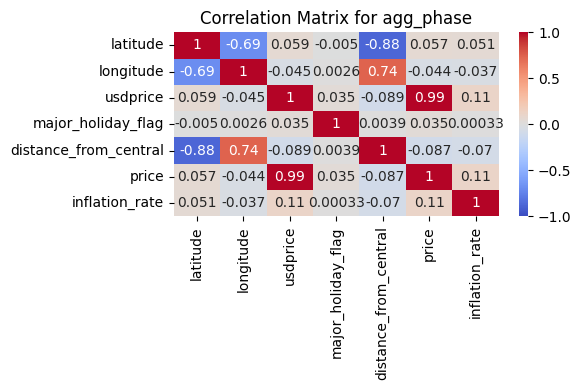

Correlation matrix for agg_geo:
                       latitude  longitude  usdprice  major_holiday_flag  \
latitude               1.000000  -0.690083  0.059264           -0.005031   
longitude             -0.690083   1.000000 -0.044828            0.002604   
usdprice               0.059264  -0.044828  1.000000            0.034548   
major_holiday_flag    -0.005031   0.002604  0.034548            1.000000   
distance_from_central -0.880670   0.735358 -0.089069            0.003928   
price                  0.057323  -0.043532  0.994603            0.035127   
inflation_rate         0.002687  -0.017885  0.099778            0.013358   

                       distance_from_central     price  inflation_rate  
latitude                           -0.880670  0.057323        0.002687  
longitude                           0.735358 -0.043532       -0.017885  
usdprice                           -0.089069  0.994603        0.099778  
major_holiday_flag                  0.003928  0.035127        0.013

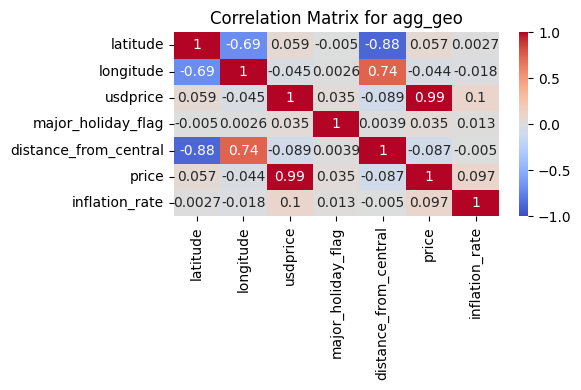

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# ---- For agg_phase ----
numeric_cols_phase = agg_phase.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix for agg_phase
corr_phase = agg_phase[numeric_cols_phase].corr()
print("Correlation matrix for agg_phase:")
print(corr_phase)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_phase, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for agg_phase")
plt.tight_layout()
plt.show()

# ---- For agg_geo ----
numeric_cols_geo = agg_geo.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix for agg_geo
corr_geo = agg_geo[numeric_cols_geo].corr()
print("Correlation matrix for agg_geo:")
print(corr_geo)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_geo, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for agg_geo")
plt.tight_layout()
plt.show()


agg_phase - Summary Statistics:
               price  inflation_rate
count  100921.000000   100921.000000
mean      129.023145        4.043062
std       117.785798       33.361355
min         4.540000      -91.134078
25%        46.250000      -12.123046
50%        91.880000        0.000000
75%       174.080000       13.988095
max      1216.670000     2719.785714


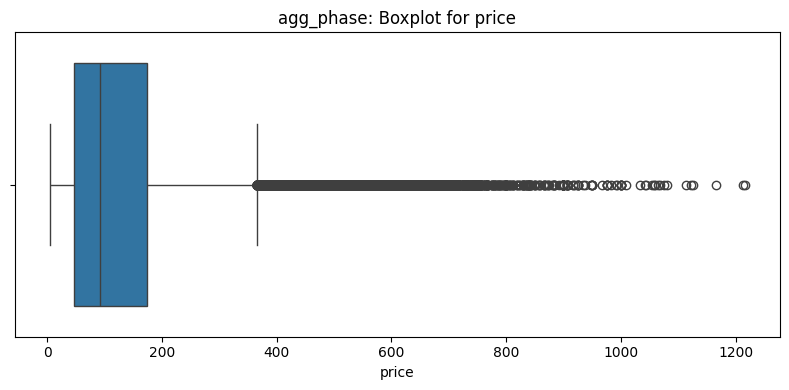

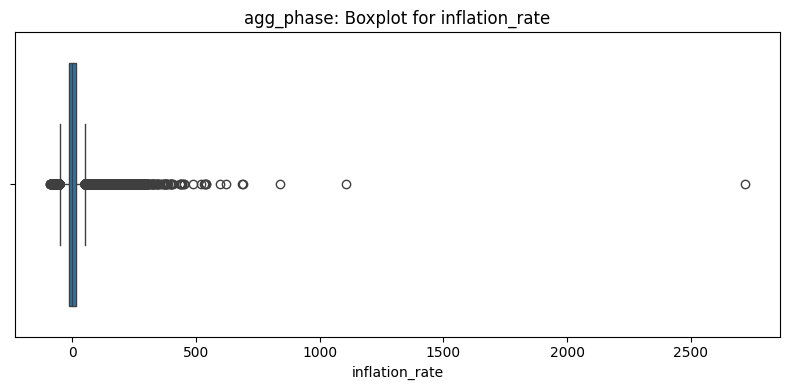

Outlier counts for agg_phase:
price: 4620 outliers
inflation_rate: 6964 outliers

agg_geo - Summary Statistics:
               price  inflation_rate
count  100921.000000   100921.000000
mean      129.023145        3.808841
std       117.785798       28.627888
min         4.540000      -91.134078
25%        46.250000       -9.523810
50%        91.880000        0.196850
75%       174.080000       11.832061
max      1216.670000      886.925000


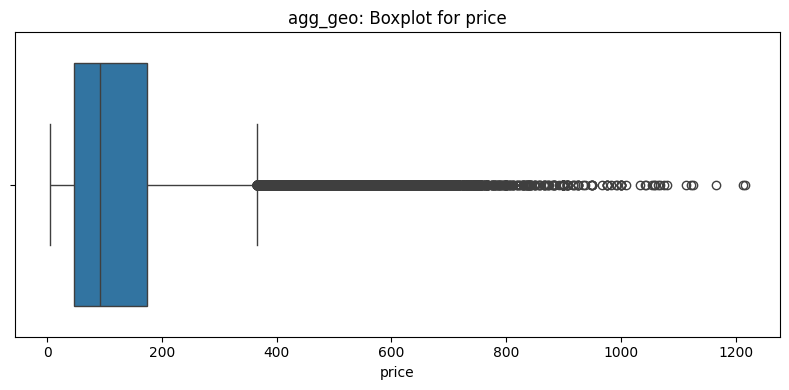

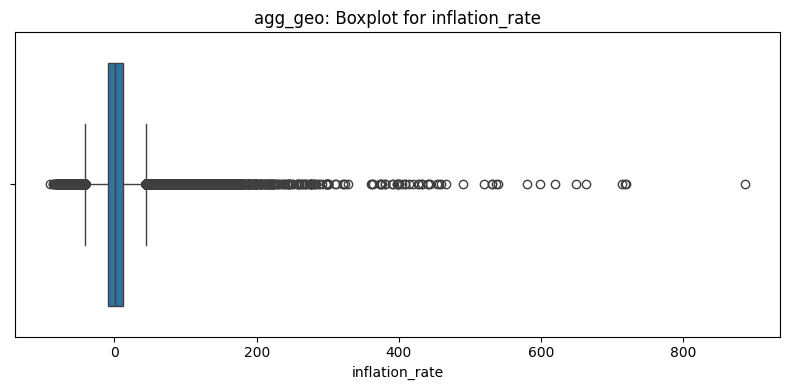

Outlier counts for agg_geo:
price: 4620 outliers
inflation_rate: 8447 outliers


In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].count()

# ================================================
# For agg_phase
# ================================================
# Assume agg_phase has at least the following numeric columns:
numeric_cols_phase = ['price', 'inflation_rate']

print("agg_phase - Summary Statistics:")
print(agg_phase[numeric_cols_phase].describe())

# Create boxplots for each numeric column in agg_phase
for col in numeric_cols_phase:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=agg_phase[col])
    plt.title(f"agg_phase: Boxplot for {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    
# Count outliers for each numeric column in agg_phase
print("Outlier counts for agg_phase:")
for col in numeric_cols_phase:
    outlier_count = count_outliers(agg_phase[col])
    print(f"{col}: {outlier_count} outliers")

# ================================================
# For agg_geo
# ================================================
# Assume agg_geo has at least the following numeric columns:
numeric_cols_geo = ['price', 'inflation_rate']

print("\nagg_geo - Summary Statistics:")
print(agg_geo[numeric_cols_geo].describe())

# Create boxplots for each numeric column in agg_geo
for col in numeric_cols_geo:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=agg_geo[col])
    plt.title(f"agg_geo: Boxplot for {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    
# Count outliers for each numeric column in agg_geo
print("Outlier counts for agg_geo:")
for col in numeric_cols_geo:
    outlier_count = count_outliers(agg_geo[col])
    print(f"{col}: {outlier_count} outliers")


Using Manhattan distance for Distance Analysis


Processing Pandemic phase:


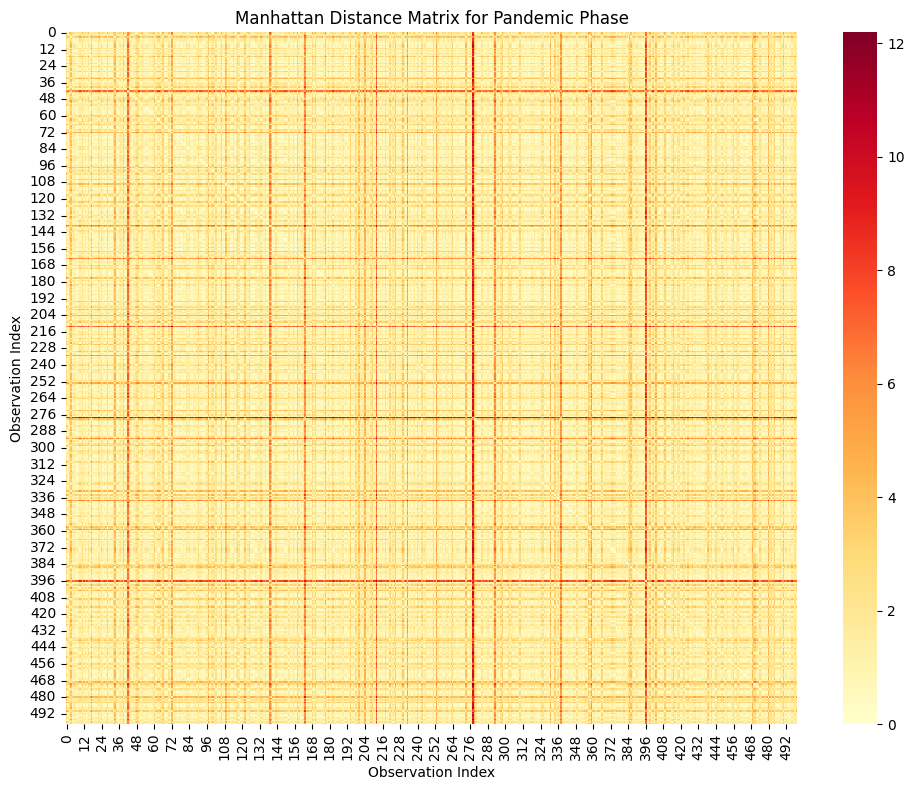


Processing Post-pandemic phase:


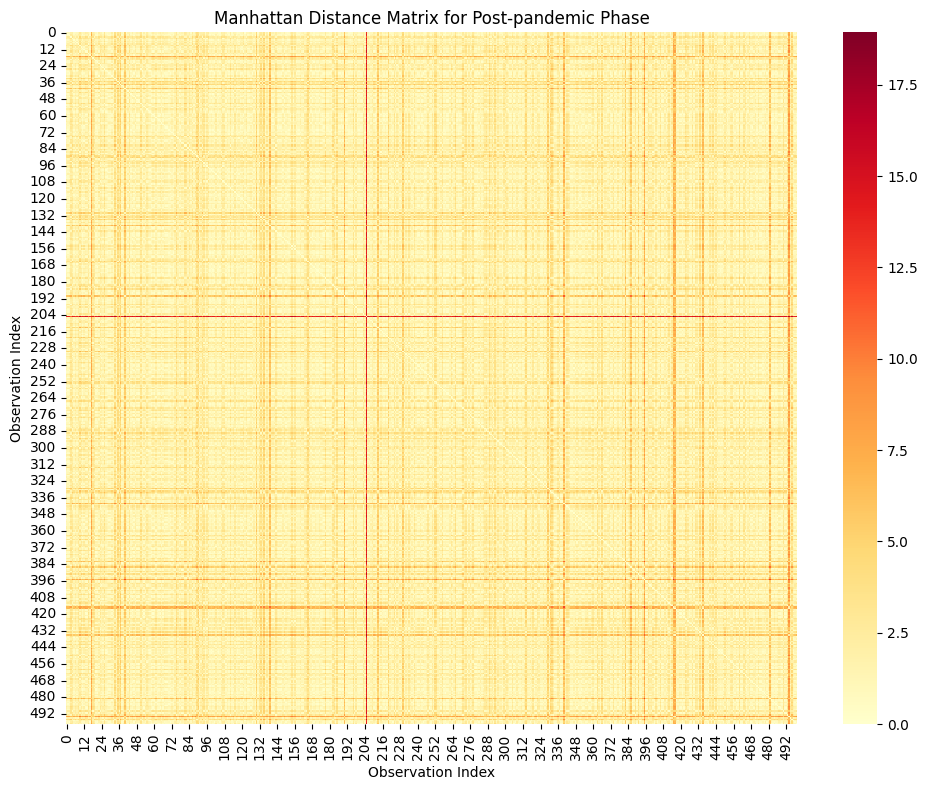


Processing Pre-pandemic phase:


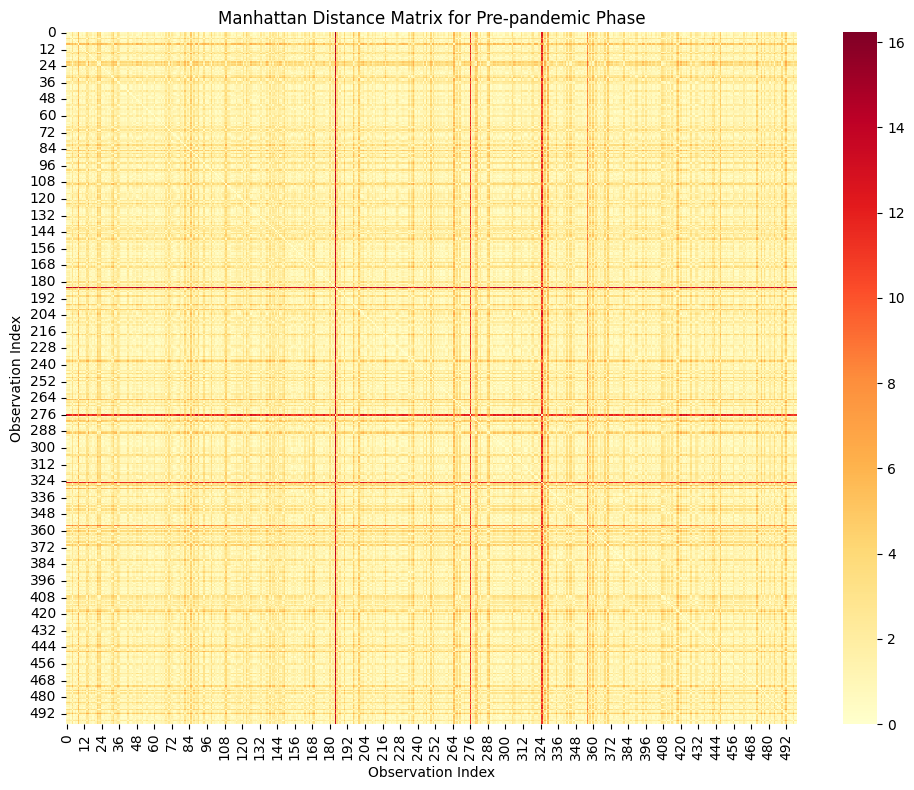

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

# Assume agg_phase is your DataFrame and has at least the following columns:
# 'pandemic_phase', 'price', 'inflation_rate', and possibly others.
# We'll focus on the continuous variables: price and inflation_rate.

# Get the unique pandemic phases
phases = agg_phase['pandemic_phase'].unique()

# Define a sample size (adjust as necessary)
n_samples = 500

for phase in phases:
    print(f"\nProcessing {phase} phase:")
    # Subset the data for the current pandemic phase
    phase_subset = agg_phase[agg_phase['pandemic_phase'] == phase]
    
    # Select numeric columns (here we assume 'price' and 'inflation_rate' are our focus;
    # adjust this list if needed)
    numeric_subset = phase_subset[['price', 'inflation_rate']].dropna()
    
    # Standardize the numeric data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_subset)
    
    # If the subset is large, sample a limited number of rows for the distance matrix computation
    if scaled_data.shape[0] > n_samples:
        sample_indices = np.random.choice(scaled_data.shape[0], n_samples, replace=False)
        scaled_data_sample = scaled_data[sample_indices, :]
    else:
        scaled_data_sample = scaled_data
    
    # Compute the Manhattan (cityblock) distance matrix on the sampled data
    manhattan_matrix = squareform(pdist(scaled_data_sample, metric='cityblock'))
    
    # Visualize the distance matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(manhattan_matrix, cmap='YlOrRd')
    plt.title(f"Manhattan Distance Matrix for {phase} Phase")
    plt.xlabel("Observation Index")
    plt.ylabel("Observation Index")
    plt.tight_layout()
    plt.show()


Manhattan ginamit above kasi individual rows yung tinitignan, whereas centroids na tinitignan below so Euclidean na

Centroids for each pandemic phase:
                   price  inflation_rate
pandemic_phase                          
Pandemic       -0.124727        0.021701
Post-pandemic   0.102356       -0.017105
Pre-pandemic   -0.503121        0.054054

Euclidean distance matrix between centroids:
[[0.         0.23037458 0.37977472]
 [0.23037458 0.         0.60964401]
 [0.37977472 0.60964401 0.        ]]


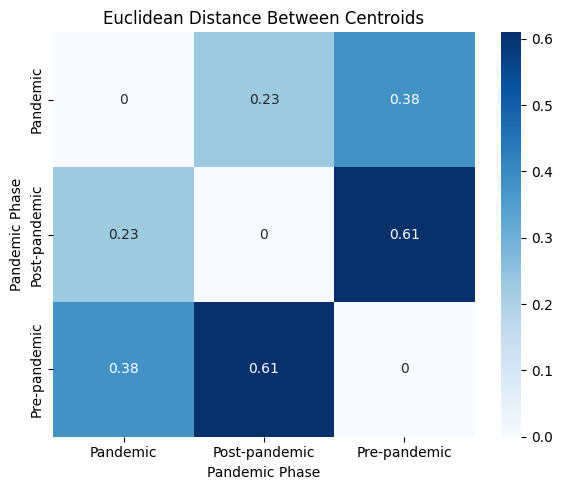

In [198]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assume agg_phase is your DataFrame and has at least:
# 'pandemic_phase', 'price', 'inflation_rate', etc.

# First, subset the data to the continuous variables of interest
df_phase = agg_phase[['pandemic_phase', 'price', 'inflation_rate']].dropna()

# Standardize the continuous variables (price and inflation_rate)
scaler = StandardScaler()
scaled_vals = scaler.fit_transform(df_phase[['price', 'inflation_rate']])
df_phase_std = pd.DataFrame(scaled_vals, columns=['price', 'inflation_rate'], index=df_phase.index)
df_phase_std['pandemic_phase'] = df_phase['pandemic_phase'].values

# Compute the centroid (mean vector) for each pandemic phase.
centroids = df_phase_std.groupby('pandemic_phase')[['price', 'inflation_rate']].mean()
print("Centroids for each pandemic phase:")
print(centroids)

# Convert centroids to an array for distance computations.
centroid_array = centroids.values

# Compute Euclidean distances between centroids.
euclidean_distances = squareform(pdist(centroid_array, metric='euclidean'))
print("\nEuclidean distance matrix between centroids:")
print(euclidean_distances)

# Visualize the Euclidean distance matrix using a heatmap.
plt.figure(figsize=(6,5))
sns.heatmap(euclidean_distances, annot=True, cmap='Blues', 
            xticklabels=centroids.index, yticklabels=centroids.index)
plt.title("Euclidean Distance Between Centroids")
plt.xlabel("Pandemic Phase")
plt.ylabel("Pandemic Phase")
plt.tight_layout()
plt.show()


Since we want to look at categorical variables for our geographic narrative, we have two distance matrices
1. Manhattan distance for continuous variables (due to the presence of outliers)
2. Jaccard distance for categorical variables (will better capture the similarity between observations)

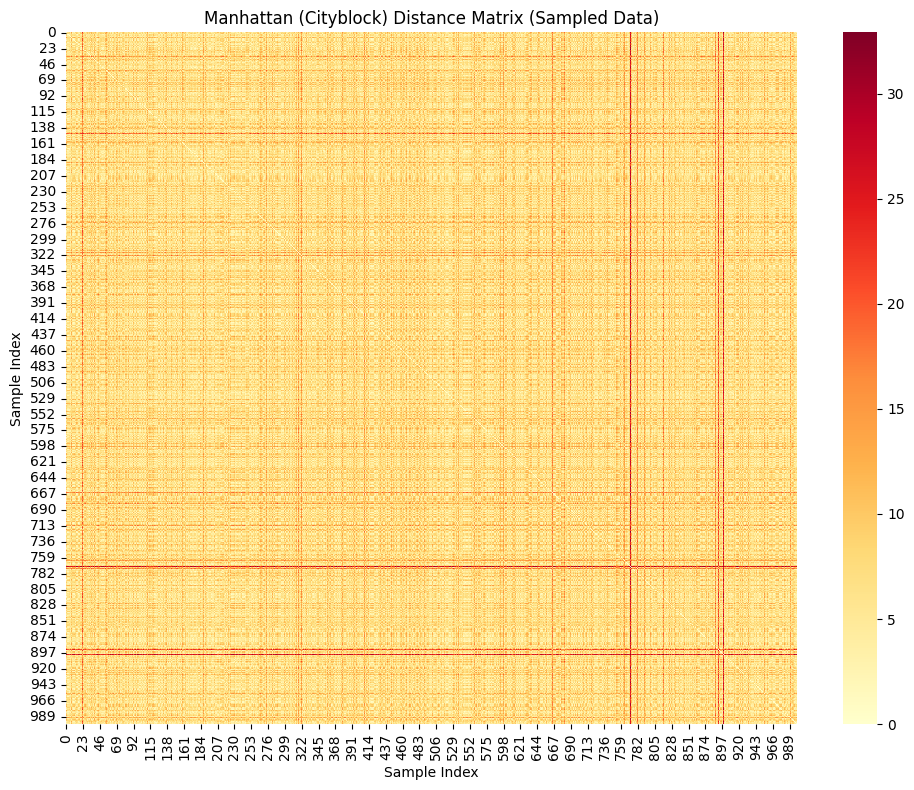

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

numeric_cols = agg_geo.select_dtypes(include=[np.number]).columns.tolist()
data_numeric = agg_geo[numeric_cols].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

n_samples = 1000
if scaled_data.shape[0] > n_samples:
    sample_indices = np.random.choice(scaled_data.shape[0], n_samples, replace=False)
    scaled_data_sample = scaled_data[sample_indices, :]
else:
    scaled_data_sample = scaled_data

manhattan_dist_matrix = squareform(pdist(scaled_data_sample, metric='cityblock'))

plt.figure(figsize=(10, 8))
sns.heatmap(manhattan_dist_matrix, cmap='YlOrRd')
plt.title("Manhattan (Cityblock) Distance Matrix (Sampled Data)")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()




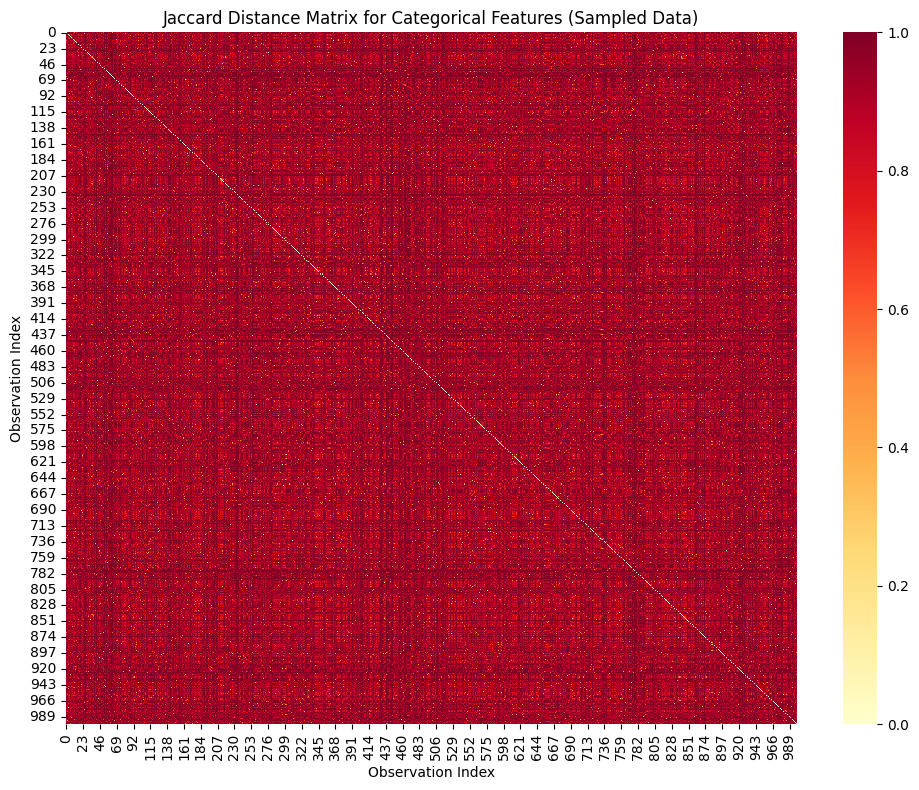

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

# Suppose agg_geo is your DataFrame with geographic variables.
# We'll focus on categorical columns that are relevant to the geographic narrative.
categorical_cols = ['admin1', 'admin2', 'market', 'category', 'climate_season', 'commodity']

# Extract the categorical data
cat_data = agg_geo[categorical_cols].copy()

# One-hot encode the categorical columns.
cat_encoded = pd.get_dummies(cat_data, columns=categorical_cols, drop_first=True)

# Drop rows with missing values (if any)
cat_encoded = cat_encoded.dropna()

# For memory efficiency, sample a subset of rows (e.g., 1000) if the dataset is too large.
n_samples = 1000
if cat_encoded.shape[0] > n_samples:
    sample_indices = np.random.choice(cat_encoded.shape[0], n_samples, replace=False)
    cat_encoded_sample = cat_encoded.iloc[sample_indices, :]
else:
    cat_encoded_sample = cat_encoded

jaccard_dist = pdist(cat_encoded_sample.values, metric='jaccard')
jaccard_dist_matrix = squareform(jaccard_dist)

plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_dist_matrix, cmap='YlOrRd')
plt.title("Jaccard Distance Matrix for Categorical Features (Sampled Data)")
plt.xlabel("Observation Index")
plt.ylabel("Observation Index")
plt.tight_layout()
plt.show()


In [201]:
df_imputed

commodity                                admin1             market  \
0          Anchovies  Autonomous region in Muslim Mindanao            Basilan   
1          Anchovies  Autonomous region in Muslim Mindanao            Basilan   
2          Anchovies  Autonomous region in Muslim Mindanao            Basilan   
3          Anchovies  Autonomous region in Muslim Mindanao            Basilan   
4          Anchovies  Autonomous region in Muslim Mindanao            Basilan   
...              ...                                   ...                ...   
59452  Water spinach                           Region XIII  Surigao del Norte   
59453  Water spinach                           Region XIII  Surigao del Norte   
59454  Water spinach                           Region XIII  Surigao del Norte   
59455  Water spinach                           Region XIII    Surigao del Sur   
59456  Water spinach                           Region XIII    Surigao del Sur   

       latitude   longitude    month       date   price  
0      6.663056  122.136111  2020-10 2020-10-15  116.25  
1      6.663056  122.136111  2021-04 2021-04-15  116.25  
2      6.663056  122.136111  2021-07 2021-07-15  116.25  
3      6.663056  122.136111  2021-08 2021-08-15  116.25  
4      6.663056  122.136111  2021-10 2021-10-15  116.25  
...         ...         ...      ...        ...     ...  
59452  9.789983  125.495822  2020-06 2020-06-15   50.00  
59453  9.789983  125.495822  2020-08 2020-08-15   50.00  
59454  9.789983  125.495822  2020-09 2020-09-15   50.00  
59455  9.056504  126.196915  2020-06 2020-06-15   25.00  
59456  9.056504  126.196915  2020-10 2020-10-15   25.00  

[59457 rows x 8 columns]

In [202]:
df_combined

date                                admin1       admin2  \
0      2019-01-15  Autonomous region in Muslim Mindanao  Maguindanao   
1      2019-01-15  Autonomous region in Muslim Mindanao  Maguindanao   
2      2019-01-15  Autonomous region in Muslim Mindanao  Maguindanao   
3      2019-01-15  Autonomous region in Muslim Mindanao  Maguindanao   
4      2019-01-15  Autonomous region in Muslim Mindanao  Maguindanao   
...           ...                                   ...          ...   
160373 2020-06-15                           Region XIII          NaN   
160374 2020-08-15                           Region XIII          NaN   
160375 2020-09-15                           Region XIII          NaN   
160376 2020-06-15                           Region XIII          NaN   
160377 2020-10-15                           Region XIII          NaN   

                   market  latitude   longitude             category  \
0           Shariff Aguak  6.864722  124.441667   cereals and tubers   
1           Shariff Aguak  6.864722  124.441667   cereals and tubers   
2           Shariff Aguak  6.864722  124.441667   cereals and tubers   
3           Shariff Aguak  6.864722  124.441667  meat, fish and eggs   
4           Shariff Aguak  6.864722  124.441667  meat, fish and eggs   
...                   ...       ...         ...                  ...   
160373  Surigao del Norte  9.789983  125.495822                  NaN   
160374  Surigao del Norte  9.789983  125.495822                  NaN   
160375  Surigao del Norte  9.789983  125.495822                  NaN   
160376    Surigao del Sur  9.056504  126.196915                  NaN   
160377    Surigao del Sur  9.056504  126.196915                  NaN   

                     commodity  unit priceflag pricetype currency   price  \
0             Potatoes (Irish)    KG    actual    Retail      PHP   65.85   
1       Rice (regular, milled)    KG    actual    Retail      PHP   40.60   
2               Sweet potatoes    KG    actual    Retail      PHP   37.46   
3                         Eggs  Unit    actual    Retail      PHP    5.50   
4                 Fish (fresh)    KG    actual    Retail      PHP  180.31   
...                        ...   ...       ...       ...      ...     ...   
160373           Water spinach   NaN       NaN       NaN      NaN   50.00   
160374           Water spinach   NaN       NaN       NaN      NaN   50.00   
160375           Water spinach   NaN       NaN       NaN      NaN   50.00   
160376           Water spinach   NaN       NaN       NaN      NaN   25.00   
160377           Water spinach   NaN       NaN       NaN      NaN   25.00   

        usdprice    month  
0         1.2663  2019-01  
1         0.7808  2019-01  
2         0.7204  2019-01  
3         0.1058  2019-01  
4         3.4675  2019-01  
...          ...      ...  
160373       NaN  2020-06  
160374       NaN  2020-08  
160375       NaN  2020-09  
160376       NaN  2020-06  
160377       NaN  2020-10  

[160378 rows x 15 columns]

In [203]:
df_combined['date'] = pd.to_datetime(df_combined['date'])

# Filter dataset to include only the specified date range
df_filtered = df_combined[(df_combined['date'] >= '2020-01-01') & (df_combined['date'] <= '2025-12-30')]

# Identify categorical columns (all except 'date' and 'price')
categorical_cols = [col for col in df_filtered.columns if col not in ['date', 'price', 'usdprice']]

# Pivot the table
df_pivot = df_filtered.pivot(index=categorical_cols, columns='date', values='price')

# Rename columns to remove 'date' from headers
df_pivot.columns = [col.strftime('%Y-%m-%d') for col in df_pivot.columns]

# Reset index to bring categorical attributes back as columns
df_pivot = df_pivot.reset_index()

df_pivot

admin1           admin2  \
0       Autonomous region in Muslim Mindanao              NaN   
1       Autonomous region in Muslim Mindanao              NaN   
2       Autonomous region in Muslim Mindanao              NaN   
3       Autonomous region in Muslim Mindanao              NaN   
4       Autonomous region in Muslim Mindanao              NaN   
...                                      ...              ...   
158498                           Region XIII  Surigao del Sur   
158499                           Region XIII  Surigao del Sur   
158500                           Region XIII  Surigao del Sur   
158501                           Region XIII  Surigao del Sur   
158502                           Region XIII  Surigao del Sur   

                 market  latitude   longitude               category  \
0               Basilan  6.663056  122.136111                    NaN   
1               Basilan  6.663056  122.136111                    NaN   
2               Basilan  6.663056  122.136111                    NaN   
3               Basilan  6.663056  122.136111                    NaN   
4               Basilan  6.663056  122.136111                    NaN   
...                 ...       ...         ...                    ...   
158498  Surigao del Sur  9.056504  126.196915  vegetables and fruits   
158499  Surigao del Sur  9.056504  126.196915  vegetables and fruits   
158500  Surigao del Sur  9.056504  126.196915  vegetables and fruits   
158501  Surigao del Sur  9.056504  126.196915  vegetables and fruits   
158502  Surigao del Sur  9.056504  126.196915  vegetables and fruits   

            commodity unit priceflag pricetype  ... 2024-04-15 2024-05-15  \
0           Anchovies  NaN       NaN       NaN  ...        NaN        NaN   
1           Anchovies  NaN       NaN       NaN  ...        NaN        NaN   
2           Anchovies  NaN       NaN       NaN  ...        NaN        NaN   
3           Anchovies  NaN       NaN       NaN  ...        NaN        NaN   
4           Anchovies  NaN       NaN       NaN  ...        NaN        NaN   
...               ...  ...       ...       ...  ...        ...        ...   
158498  Water spinach   KG    actual    Retail  ...        NaN        NaN   
158499  Water spinach   KG    actual    Retail  ...        NaN        NaN   
158500  Water spinach   KG    actual    Retail  ...        NaN        NaN   
158501  Water spinach   KG    actual    Retail  ...        NaN        NaN   
158502  Water spinach   KG    actual    Retail  ...        NaN        NaN   

        2024-06-15  2024-07-15  2024-08-15  2024-09-15  2024-10-15  \
0              NaN         NaN         NaN         NaN         NaN   
1              NaN         NaN         NaN         NaN         NaN   
2              NaN         NaN         NaN         NaN         NaN   
3              NaN         NaN         NaN         NaN         NaN   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
158498         NaN         NaN         NaN         NaN         NaN   
158499         NaN         NaN         NaN         NaN         NaN   
158500         NaN         NaN         NaN         NaN         NaN   
158501         NaN         NaN         NaN         NaN         NaN   
158502         NaN         NaN         NaN         NaN         NaN   

        2024-11-15  2024-12-15  2025-01-15  
0              NaN         NaN         NaN  
1              NaN         NaN         NaN  
2              NaN         NaN         NaN  
3              NaN         NaN         NaN  
4              NaN         NaN         NaN  
...            ...         ...         ...  
158498         NaN         NaN         NaN  
158499         NaN         NaN         NaN  
158500         NaN         NaN         NaN  
158501         NaN         NaN         NaN  
158502         NaN         NaN         NaN  

[158503 rows x 73 columns]

Clustering (K means, PCA)

In [204]:
# Read the CSV file
file_path = 'pivot_date.csv'
df_pivott = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df_pivott

Unnamed: 0                                admin1           admin2  \
0              0  Autonomous region in Muslim Mindanao          Basilan   
1              1  Autonomous region in Muslim Mindanao          Basilan   
2              2  Autonomous region in Muslim Mindanao          Basilan   
3              3  Autonomous region in Muslim Mindanao          Basilan   
4              4  Autonomous region in Muslim Mindanao          Basilan   
...          ...                                   ...              ...   
5290        5290                           Region XIII  Surigao del Sur   
5291        5291                           Region XIII  Surigao del Sur   
5292        5292                           Region XIII  Surigao del Sur   
5293        5293                           Region XIII  Surigao del Sur   
5294        5294                           Region XIII  Surigao del Sur   

       market  latitude   longitude               category  \
0     Basilan  6.663056  122.136111     cereals and tubers   
1     Basilan  6.663056  122.136111     cereals and tubers   
2     Basilan  6.663056  122.136111     cereals and tubers   
3     Basilan  6.663056  122.136111     cereals and tubers   
4     Basilan  6.663056  122.136111     cereals and tubers   
...       ...       ...         ...                    ...   
5290   Tandag  9.078333  126.198611        pulses and nuts   
5291   Tandag  9.078333  126.198611  vegetables and fruits   
5292   Tandag  9.078333  126.198611  vegetables and fruits   
5293   Tandag  9.078333  126.198611  vegetables and fruits   
5294   Tandag  9.078333  126.198611  vegetables and fruits   

                   commodity unit priceflag  ... 2024-04-15 2024-05-15  \
0           Potatoes (Irish)   KG    actual  ...     165.71     154.29   
1             Rice (premium)   KG    actual  ...        NaN        NaN   
2     Rice (regular, milled)   KG    actual  ...      54.44      54.96   
3             Rice (special)   KG    actual  ...        NaN      60.49   
4         Rice (well milled)   KG    actual  ...      56.71        NaN   
...                      ...  ...       ...  ...        ...        ...   
5290            Beans (mung)   KG    actual  ...        NaN        NaN   
5291                 Cabbage   KG    actual  ...        NaN        NaN   
5292                 Carrots   KG    actual  ...        NaN        NaN   
5293            Onions (red)   KG    actual  ...        NaN        NaN   
5294                Tomatoes   KG    actual  ...        NaN        NaN   

      2024-06-15  2024-07-15  2024-08-15  2024-09-15  2024-10-15  2024-11-15  \
0         156.43      164.29         NaN         NaN      167.14         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2          53.88       52.45       51.13       53.56       52.44       51.57   
3          59.54       60.90       60.13       58.58       57.94       57.56   
4          55.85       56.94       55.06       54.71       53.94         NaN   
...          ...         ...         ...         ...         ...         ...   
5290         NaN         NaN         NaN         NaN         NaN         NaN   
5291         NaN         NaN         NaN         NaN         NaN         NaN   
5292         NaN         NaN         NaN         NaN         NaN         NaN   
5293         NaN         NaN         NaN         NaN         NaN         NaN   
5294         NaN         NaN         NaN         NaN         NaN         NaN   

      2024-12-15  2025-01-15  
0            NaN      161.43  
1            NaN         NaN  
2          53.69       50.39  
3          56.58       57.29  
4            NaN       51.44  
...          ...         ...  
5290         NaN         NaN  
5291         NaN         NaN  
5292         NaN         NaN  
5293         NaN         NaN  
5294         NaN         NaN  

[5295 rows x 83 columns]

In [205]:
df_pivott.columns

Index(['Unnamed: 0', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       '2019-01-15', '2019-02-15', '2019-03-15', '2019-04-15', '2019-05-15',
       '2019-06-15', '2019-07-15', '2019-08-15', '2019-09-15', '2019-10-15',
       '2019-11-15', '2019-12-15', '2020-01-15', '2020-02-15', '2020-05-15',
       '2020-06-15', '2020-07-15', '2020-08-15', '2020-09-15', '2020-10-15',
       '2020-11-15', '2020-12-15', '2021-01-15', '2021-02-15', '2021-03-15',
       '2021-04-15', '2021-05-15', '2021-06-15', '2021-07-15', '2021-08-15',
       '2021-09-15', '2021-10-15', '2021-11-15', '2021-12-15', '2022-01-15',
       '2022-02-15', '2022-03-15', '2022-04-15', '2022-05-15', '2022-06-15',
       '2022-07-15', '2022-08-15', '2022-09-15', '2022-10-15', '2022-11-15',
       '2022-12-15', '2023-01-15', '2023-02-15', '2023-03-15', '2023-04-15',
       '2023-05-15', '2023-06-15', '2023-07-15', '2023-08-15', '2023-09-15',

In [206]:
df_pivott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5295 entries, 0 to 5294
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5295 non-null   int64  
 1   admin1      5295 non-null   object 
 2   admin2      5295 non-null   object 
 3   market      5295 non-null   object 
 4   latitude    5295 non-null   float64
 5   longitude   5295 non-null   float64
 6   category    5295 non-null   object 
 7   commodity   5295 non-null   object 
 8   unit        5295 non-null   object 
 9   priceflag   5295 non-null   object 
 10  pricetype   5295 non-null   object 
 11  currency    5295 non-null   object 
 12  2019-01-15  216 non-null    float64
 13  2019-02-15  217 non-null    float64
 14  2019-03-15  228 non-null    float64
 15  2019-04-15  182 non-null    float64
 16  2019-05-15  175 non-null    float64
 17  2019-06-15  18 non-null     float64
 18  2019-07-15  25 non-null     float64
 19  2019-08-15  21 non-null    

In [207]:
# import pandas as pd
# import numpy as np

# # Load df_pivott (assuming it’s already loaded)
# df_pivott = df_pivott.drop(columns=[col for col in df_pivott.columns if col.startswith('2019')])

# # Define the expected full months per year
# years = [2020, 2021, 2022, 2023, 2024]
# months = [f"{m:02d}" for m in range(1, 13)]  # '01' to '12'
# expected_cols = [f"{y}-{m}-15" for y in years for m in months]

# # Add missing months with NaN
# for col in expected_cols:
#     if col not in df_pivott.columns:
#         df_pivott[col] = np.nan  # Create missing month columns

# # Reorder columns to maintain chronological order
# df_pivott = df_pivott[['Unnamed: 0', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
#                         'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency']
#                         + expected_cols]

# # Drop rows with 30 or more null values
# df_pivott = df_pivott.dropna(thresh=len(df_pivott.columns) - 40)

# # Backward Fill for all numeric columns, ensuring fills are row-wise (not uniform across rows)
# num_cols = df_pivott.select_dtypes(include=[np.number]).columns
# df_pivott[num_cols] = df_pivott[num_cols].bfill(axis=1)  # Backward fill across columns (time-based trend)

# # Display result
# df_pivott


In [208]:
import pandas as pd
import numpy as np

# Load df_pivott (assuming it’s already loaded)
df_pivott = df_pivott.drop(columns=[col for col in df_pivott.columns if col.startswith('2019')])

# Define the expected full months per year
years = [2020, 2021, 2022, 2023, 2024]
months = [f"{m:02d}" for m in range(1, 13)]  # '01' to '12'
expected_cols = [f"{y}-{m}-15" for y in years for m in months]

# Add missing months with NaN
for col in expected_cols:
    if col not in df_pivott.columns:
        df_pivott[col] = np.nan  # Create missing month columns

# Reorder columns to maintain chronological order
df_pivott = df_pivott[['Unnamed: 0', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
                        'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency']
                        + expected_cols]

# Drop rows with 30 or more null values
df_pivott = df_pivott.dropna(thresh=len(df_pivott.columns) - 30)

# Identify numeric columns while excluding latitude & longitude
num_cols = df_pivott.select_dtypes(include=[np.number]).columns
price_cols = [col for col in num_cols if col not in ['latitude', 'longitude']]

# Apply both Backward Fill and Forward Fill row-wise
df_pivott[price_cols] = df_pivott[price_cols].bfill(axis=1).ffill(axis=1)

# Round only price columns to 2 decimal places (latitude & longitude remain unchanged)
df_pivott[price_cols] = df_pivott[price_cols].round(2)

# Display result
df_pivott


Unnamed: 0                                admin1           admin2  \
2            2.0  Autonomous region in Muslim Mindanao          Basilan   
3            3.0  Autonomous region in Muslim Mindanao          Basilan   
4            4.0  Autonomous region in Muslim Mindanao          Basilan   
5            5.0  Autonomous region in Muslim Mindanao          Basilan   
6            6.0  Autonomous region in Muslim Mindanao          Basilan   
...          ...                                   ...              ...   
5271      5271.0                           Region XIII  Surigao del Sur   
5273      5273.0                           Region XIII  Surigao del Sur   
5275      5275.0                           Region XIII  Surigao del Sur   
5276      5276.0                           Region XIII  Surigao del Sur   
5278      5278.0                           Region XIII  Surigao del Sur   

               market  latitude   longitude               category  \
2             Basilan  6.663056  122.136111     cereals and tubers   
3             Basilan  6.663056  122.136111     cereals and tubers   
4             Basilan  6.663056  122.136111     cereals and tubers   
5             Basilan  6.663056  122.136111     cereals and tubers   
6             Basilan  6.663056  122.136111     cereals and tubers   
...               ...       ...         ...                    ...   
5271  Surigao del Sur  9.056504  126.196915  vegetables and fruits   
5273  Surigao del Sur  9.056504  126.196915  vegetables and fruits   
5275  Surigao del Sur  9.056504  126.196915  vegetables and fruits   
5276  Surigao del Sur  9.056504  126.196915  vegetables and fruits   
5278  Surigao del Sur  9.056504  126.196915  vegetables and fruits   

                   commodity unit priceflag  ... 2024-03-15 2024-04-15  \
2     Rice (regular, milled)   KG    actual  ...      52.39      54.44   
3             Rice (special)   KG    actual  ...      60.49      60.49   
4         Rice (well milled)   KG    actual  ...      56.71      56.71   
5             Sweet potatoes   KG    actual  ...      54.29      54.29   
6                       Taro   KG    actual  ...      52.86      52.86   
...                      ...  ...       ...  ...        ...        ...   
5271                 Coconut   KG    actual  ...      23.75      23.75   
5273                  Garlic   KG    actual  ...     157.50     152.50   
5275       Mangoes (carabao)   KG    actual  ...     113.75     123.75   
5276            Onions (red)   KG    actual  ...     152.50     130.00   
5278                Squashes   KG    actual  ...      35.63      35.63   

      2024-05-15  2024-06-15  2024-07-15  2024-08-15  2024-09-15  2024-10-15  \
2          54.96       53.88       52.45       51.13       53.56       52.44   
3          60.49       59.54       60.90       60.13       58.58       57.94   
4          55.85       55.85       56.94       55.06       54.71       53.94   
5          54.29       53.57       53.57       55.00       55.00       55.00   
6          52.86       50.71       50.71       49.29       49.29       49.29   
...          ...         ...         ...         ...         ...         ...   
5271       23.75       23.75       23.75       23.13       23.13       23.13   
5273      152.50      155.00      150.00      151.25      152.50      150.00   
5275      123.75      116.25      116.25      116.25      168.75      140.00   
5276      110.00      126.25      128.75      126.25      118.75      122.50   
5278       45.00       45.00       32.50       32.50       32.50       35.63   

      2024-11-15  2024-12-15  
2          51.57       53.69  
3          57.56       56.58  
4          53.94       53.94  
5          55.00       55.00  
6          49.29       49.29  
...          ...         ...  
5271       23.13       23.13  
5273      158.75      170.00  
5275      140.00      141.25  
5276      130.00      131.25  
5278       35.63       35.63  

[1669 rows x 72 columns]

In [210]:
# Get all non-date columns to use as id_vars, excluding 'Unnamed: 0'
id_columns = ['admin1', 'admin2', 'market', 'latitude', 'longitude', 'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency']

# Melt the dataframe
melted_df = pd.melt(df_pivott.drop(columns=['Unnamed: 0']),
                    id_vars=id_columns,  # Keep all these columns as identifiers
                    var_name='date',     # New column for dates
                    value_name='price')  # New column for prices

# Convert date column to datetime
melted_df['date'] = pd.to_datetime(melted_df['date'], errors='coerce')

# Sort the dataframe
melted_df = melted_df.sort_values(id_columns + ['date'])

# Reset index
melted_df = melted_df.reset_index(drop=True)

# Display the result
print(melted_df.head())
melted_df.to_csv('melted.csv')

                                 admin1   admin2   market  latitude  \
0  Autonomous region in Muslim Mindanao  Basilan  Basilan  6.663056   
1  Autonomous region in Muslim Mindanao  Basilan  Basilan  6.663056   
2  Autonomous region in Muslim Mindanao  Basilan  Basilan  6.663056   
3  Autonomous region in Muslim Mindanao  Basilan  Basilan  6.663056   
4  Autonomous region in Muslim Mindanao  Basilan  Basilan  6.663056   

    longitude            category               commodity unit priceflag  \
0  122.136111  cereals and tubers  Rice (regular, milled)   KG    actual   
1  122.136111  cereals and tubers  Rice (regular, milled)   KG    actual   
2  122.136111  cereals and tubers  Rice (regular, milled)   KG    actual   
3  122.136111  cereals and tubers  Rice (regular, milled)   KG    actual   
4  122.136111  cereals and tubers  Rice (regular, milled)   KG    actual   

  pricetype currency       date  price  
0    Retail      PHP 2020-01-15   36.8  
1    Retail      PHP 2020-02-15   